In [61]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time

from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path

from matplotlib.patches import Circle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

# define desired PSF dimensions and pixelscale in units of lambda/D
npsf=64
psf_pixelscale_mas = 21.84*u.mas/u.pix
psf_pixelscale_lamD = psf_pixelscale_mas.value / mas_per_lamD.value
psf_pixelscale = 13e-6 * psf_pixelscale_lamD/(1/2)
psf_pixelscale_m = psf_pixelscale*u.m/u.pix

polaxis = 10

ndisk = 64
disk_pixelscale_mas = 21.84*u.mas/u.pix
disk_pixelscale_lamD = (disk_pixelscale_mas/mas_per_lamD).value

band1_wavelength = 575e-9*u.m
iwa_band1 = 2.8
owa_band1 = 9.7

iwa = iwa_band1 * wavelength_c/band1_wavelength
owa = owa_band1 * wavelength_c/band1_wavelength

iwa_mas = iwa*mas_per_lamD
owa_mas = owa*mas_per_lamD

In [17]:
def diskinimg(File_array):
    files=File_array
    l=len(files)
    xpix=(np.arange (-32, 32, 1))*0.02182
    ypix=(np.arange (-32, 32, 1))*0.02182
    figr=[]
    for i in range(0,l):
        I0=fits.getdata(files[i]+'I_0_hlc.fits')
        I90=fits.getdata(files[i]+'I_90_hlc.fits')
        I45=fits.getdata(files[i]+'I_45_hlc.fits')
        I135=fits.getdata(files[i]+'I_135_hlc.fits')
        
        px=128-64
        py=128+64
        
        disk0=I0[px:py,px:py]
        disk90=I90[px:py,px:py]
        disk45=I45[px:py,px:py]
        disk135=I135[px:py,px:py]
        
        circ1=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ2=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ3=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ4=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ5=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ6=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ7=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ8=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        
        path=files[i]
        fig_path=path+'pol_int_disk'+'.pdf'
        
        fig = plt.figure(figsize=(25, 10))
        ax1=fig.add_subplot(141)
        ax1.yaxis.set_ticks_position('both')
        ax1.xaxis.set_ticks_position('both')
        ax1.minorticks_on()
        ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im1=ax1.imshow(disk0,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax1.invert_yaxis()
        ax1.add_patch(circ1)
        ax1.add_patch(circ2)
        ax1.set_ylabel('arcsec',fontsize=18)
        ax1.set_xlabel('arcsec',fontsize=18)
        ax1.set_title('$I_0$',fontsize=18)
        cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)

        ax2=fig.add_subplot(142)
        ax2.yaxis.set_ticks_position('both')
        ax2.xaxis.set_ticks_position('both')
        ax2.minorticks_on()
        ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im2=ax2.imshow(disk90,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax2.invert_yaxis()
        ax2.add_patch(circ3)
        ax2.add_patch(circ4)
        ax2.set_ylabel('arcsec',fontsize=18)
        ax2.set_xlabel('arcsec',fontsize=18)
        ax2.set_title('$I_{90}$',fontsize=18)
        cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        
        ax3=fig.add_subplot(143)
        ax3.yaxis.set_ticks_position('both')
        ax3.xaxis.set_ticks_position('both')
        ax3.minorticks_on()
        ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im3=ax3.imshow(disk45,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax3.invert_yaxis()
        ax3.add_patch(circ5)
        ax3.add_patch(circ6)
        ax3.set_ylabel('arcsec',fontsize=18)
        ax3.set_xlabel('arcsec',fontsize=18)
        ax3.set_title('$I_{45}$',fontsize=18)
        cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)

        ax4=fig.add_subplot(144)
        ax4.yaxis.set_ticks_position('both')
        ax4.xaxis.set_ticks_position('both')
        ax4.minorticks_on()
        ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im4=ax4.imshow(disk135,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax4.invert_yaxis()
        ax4.add_patch(circ7)
        ax4.add_patch(circ8)
        ax4.set_ylabel('arcsec',fontsize=18)
        ax4.set_xlabel('arcsec',fontsize=18)
        ax4.set_title('$I_{135}$',fontsize=18)
        cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        
        fig.subplots_adjust(hspace=0.1, wspace=0.45, top=0.9, right=0.95)
        fig.savefig(fig_path, format='pdf', bbox_inches='tight')
        figr.append(fig)
    return(figr)

In [18]:
Main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/HLC_band_analog/'
Inc=['Astrosil/','Olivines/','Astrosil_Olivines/','Carbon/','Graphite/']
n=len(Inc)
Inc_dir=[]
for i in range(0,n):
    d_dir=Main_dir+Inc[i]
    Inc_dir.append(d_dir)

In [7]:
Inc_dir[0]

'/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/HLC_band_analog/Astrosil/'

[<Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>]

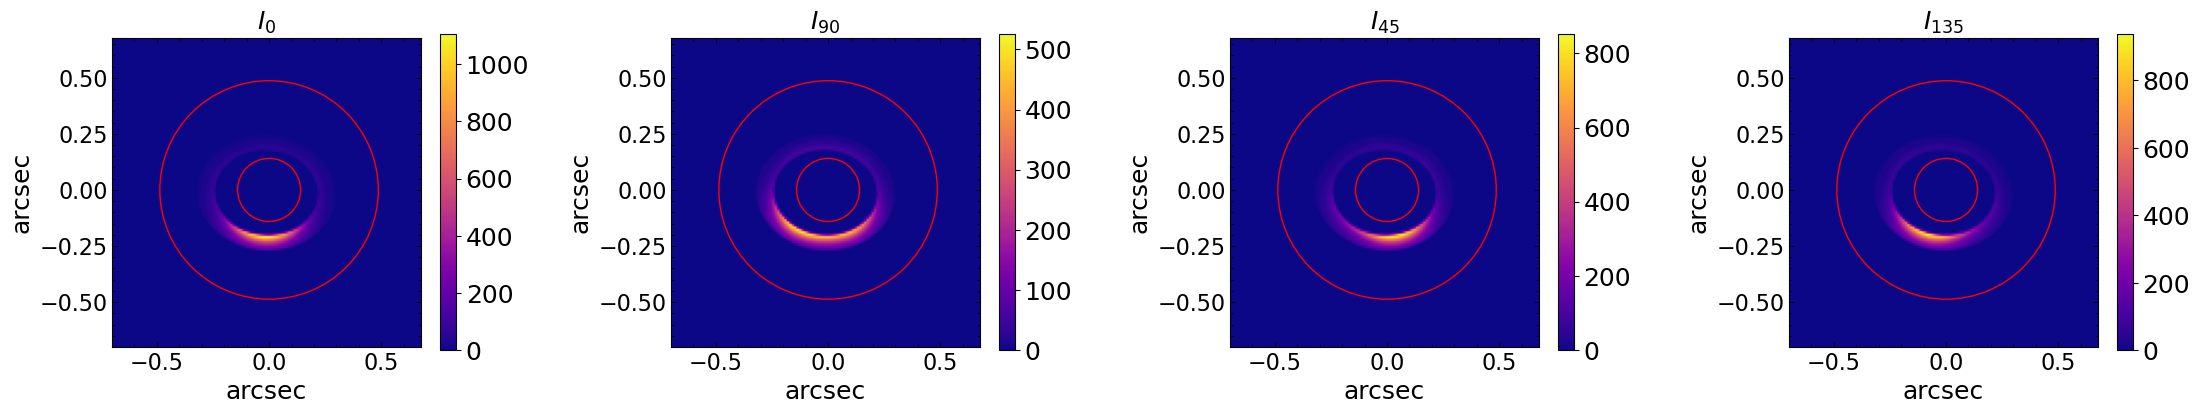

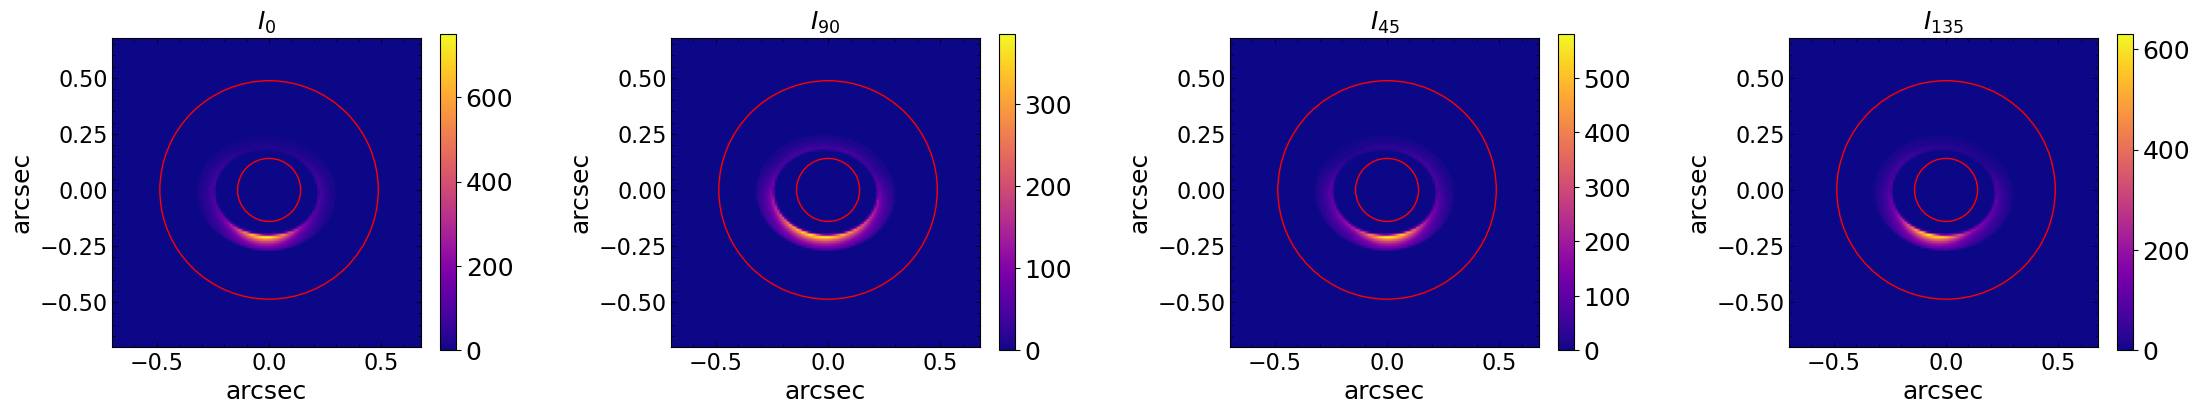

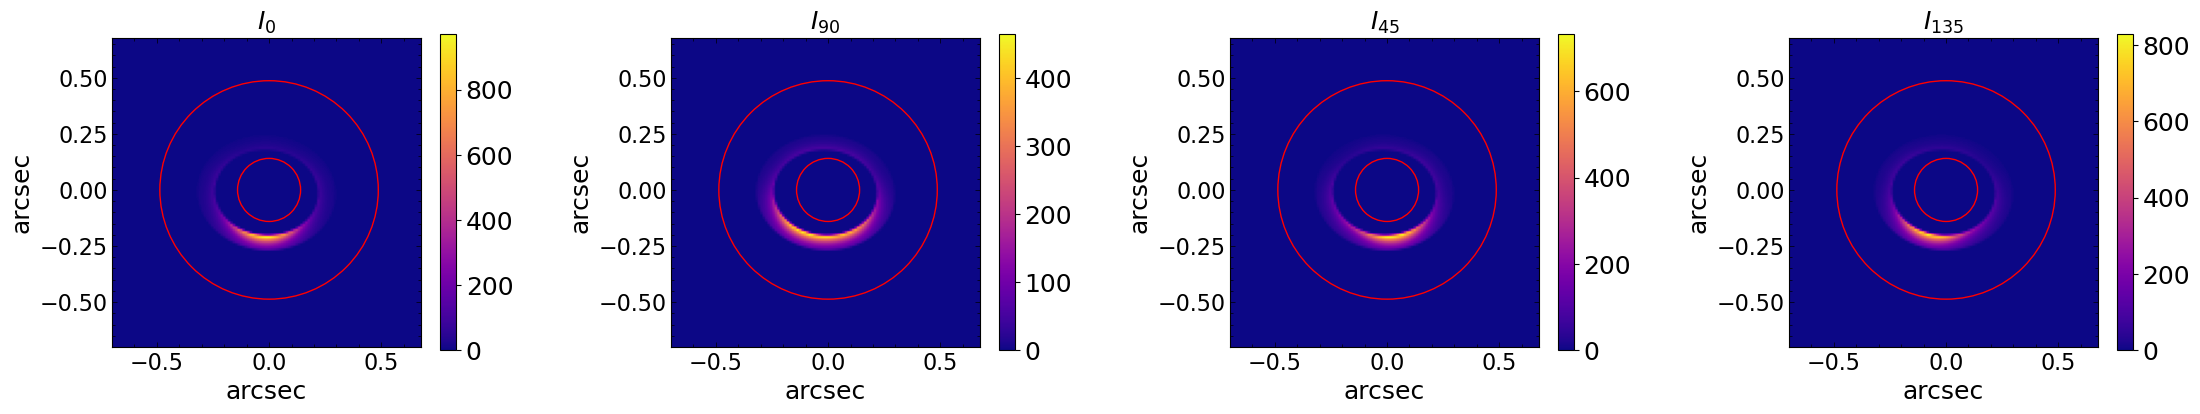

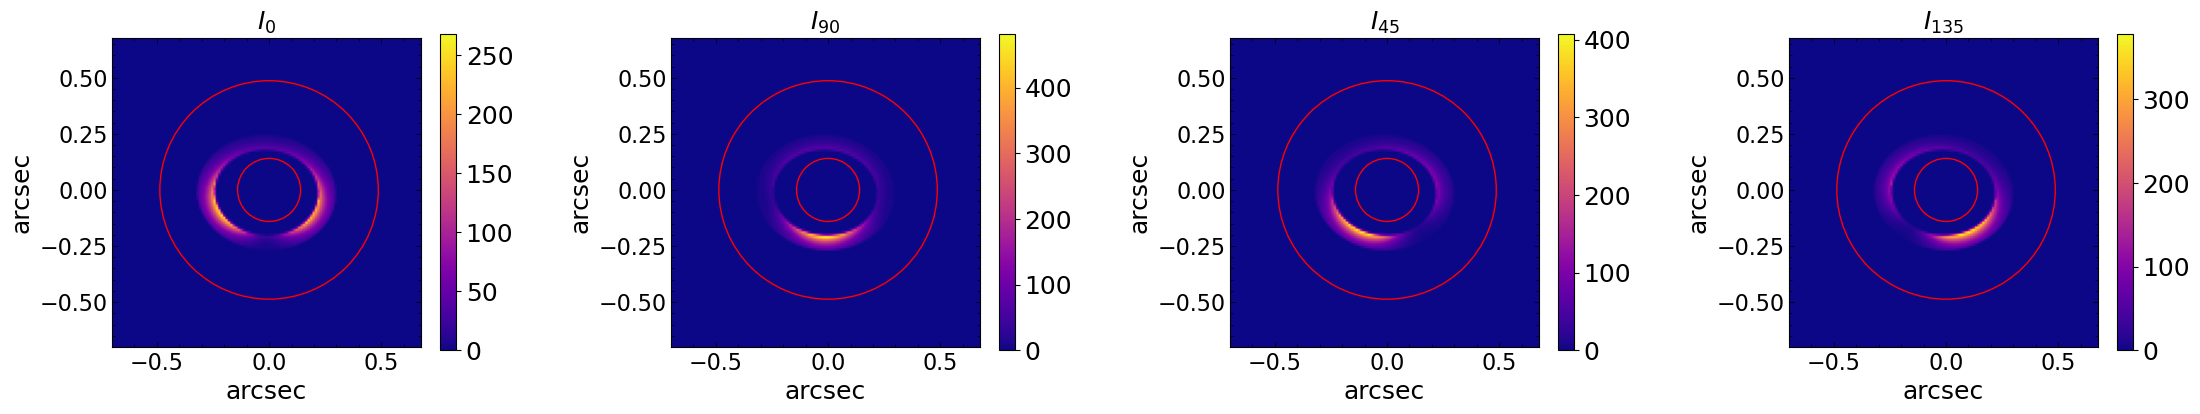

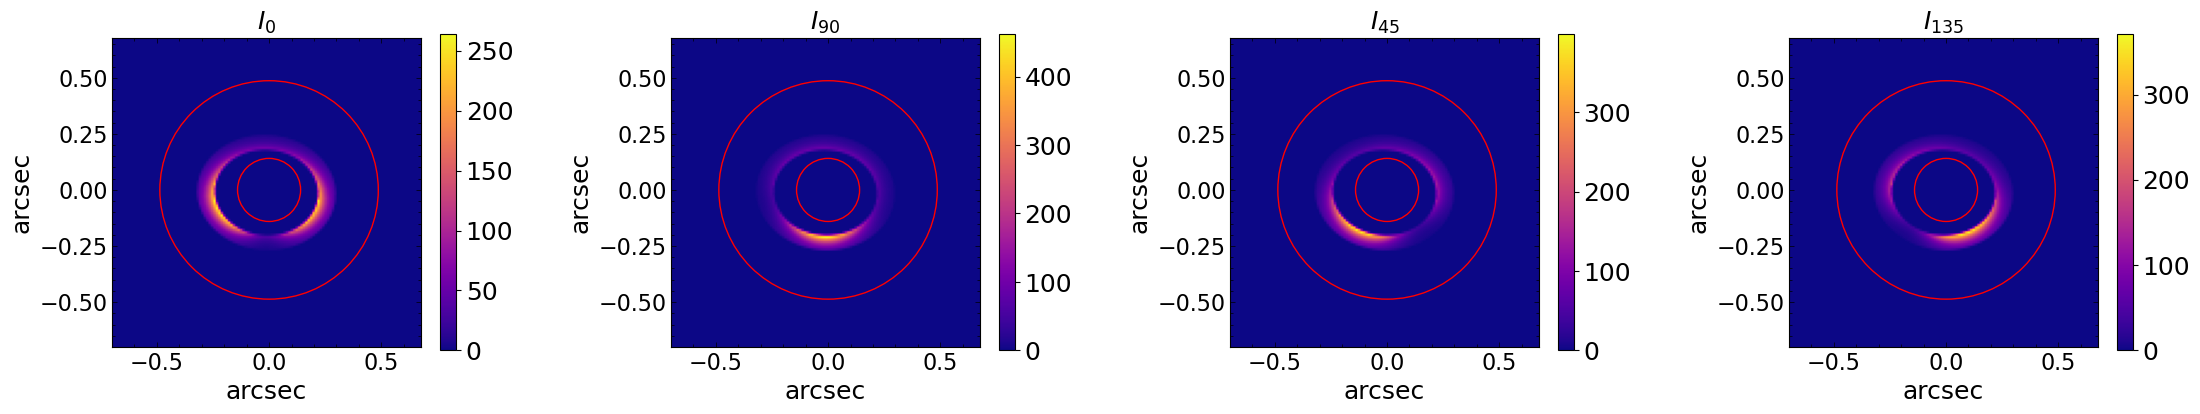

In [19]:
diskinimg(Inc_dir)

In [20]:
def disksimimages(File_array):
    files=File_array
    l=len(files)
    ipsf_fpath = Path('/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Roman_psf/Hpc_run/final_psfs/hlc_band1_ipsfs_20230221.hdf5')
    f = h5py.File(ipsf_fpath, 'r')
    ipsf_matrix = np.array(f['ipsf_matrix'])
    f.close()
    figr=[]
    xpix=(np.arange (-32, 32, 1))*psf_pixelscale_mas.value/1000
    ypix=(np.arange (-32, 32, 1))*psf_pixelscale_mas.value/1000
    for i in range(0,l):
        
        I0=fits.getdata(files[i]+'I_0_hlc.fits')
        I90=fits.getdata(files[i]+'I_90_hlc.fits')
        I45=fits.getdata(files[i]+'I_45_hlc.fits')
        I135=fits.getdata(files[i]+'I_135_hlc.fits')
        
        px=128-32
        py=128+32
        
        disk0=I0[px:py,px:py]
        disk90=I90[px:py,px:py]
        disk45=I45[px:py,px:py]
        disk135=I135[px:py,px:py]
        
        disk0_sim=np.reshape(ipsf_matrix.dot(disk0.flatten()), (npsf,npsf))
        disk90_sim=np.reshape(ipsf_matrix.dot(disk90.flatten()), (npsf,npsf))
        disk45_sim=np.reshape(ipsf_matrix.dot(disk45.flatten()), (npsf,npsf))
        disk135_sim=np.reshape(ipsf_matrix.dot(disk135.flatten()), (npsf,npsf))
        
        
    
        
        I_0_image = fits.PrimaryHDU(disk0_sim)
        I_90_image= fits.PrimaryHDU(disk90_sim)
        I_45_image= fits.PrimaryHDU(disk45_sim)
        I_135_image= fits.PrimaryHDU(disk135_sim)
        I_0_hdul = fits.HDUList([I_0_image])
        I_90_hdul = fits.HDUList([I_90_image])
        I_45_hdul = fits.HDUList([I_45_image])
        I_135_hdul = fits.HDUList([I_135_image])
        I_0_hdul.writeto(files[i]+'disk_0.fits',overwrite=True)
        I_90_hdul.writeto(files[i]+'disk_90.fits',overwrite=True)
        I_45_hdul.writeto(files[i]+'disk_45.fits',overwrite=True)
        I_135_hdul.writeto(files[i]+'disk_135.fits',overwrite=True)
        
        circ1=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ2=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ3=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ4=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ5=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ6=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ7=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ8=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        
        path=files[i]
        fig_path=path+'pol_disk_sim_convolved'+'.pdf'
        
        fig = plt.figure(figsize=(25, 10))
        ax1=fig.add_subplot(141)
        ax1.yaxis.set_ticks_position('both')
        ax1.xaxis.set_ticks_position('both')
        ax1.minorticks_on()
        ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im1=ax1.imshow(disk0_sim,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax1.invert_yaxis()
        ax1.add_patch(circ1)
        ax1.add_patch(circ2)
        ax1.set_ylabel('arcsec',fontsize=18)
        ax1.set_xlabel('arcsec',fontsize=18)
        ax1.set_title('$I_0$',fontsize=18)
        cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        cb.set_label("ph/s",fontsize=18)

        ax2=fig.add_subplot(142)
        ax2.yaxis.set_ticks_position('both')
        ax2.xaxis.set_ticks_position('both')
        ax2.minorticks_on()
        ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im2=ax2.imshow(disk90_sim,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax2.invert_yaxis()
        ax2.add_patch(circ3)
        ax2.add_patch(circ4)
        ax2.set_ylabel('arcsec',fontsize=18)
        ax2.set_xlabel('arcsec',fontsize=18)
        ax2.set_title('$I_{90}$',fontsize=18)
        cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        cb.set_label("ph/s",fontsize=18)
        
        ax3=fig.add_subplot(143)
        ax3.yaxis.set_ticks_position('both')
        ax3.xaxis.set_ticks_position('both')
        ax3.minorticks_on()
        ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im3=ax3.imshow(disk45_sim,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax3.invert_yaxis()
        ax3.add_patch(circ5)
        ax3.add_patch(circ6)
        ax3.set_ylabel('arcsec',fontsize=18)
        ax3.set_xlabel('arcsec',fontsize=18)
        ax3.set_title('$I_{45}$',fontsize=18)
        cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        cb.set_label("ph/s",fontsize=18)

        ax4=fig.add_subplot(144)
        ax4.yaxis.set_ticks_position('both')
        ax4.xaxis.set_ticks_position('both')
        ax4.minorticks_on()
        ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im4=ax4.imshow(disk135_sim,cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax4.invert_yaxis()
        ax4.add_patch(circ7)
        ax4.add_patch(circ8)
        ax4.set_ylabel('arcsec',fontsize=18)
        ax4.set_xlabel('arcsec',fontsize=18)
        ax4.set_title('$I_{135}$',fontsize=18)
        cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        cb.set_label("ph/s",fontsize=18)
        
        fig.subplots_adjust(hspace=0.1, wspace=0.45, top=0.9, right=0.95)
        fig.savefig(fig_path, format='pdf', bbox_inches='tight')
        figr.append(fig)
    return(figr)

[<Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>]

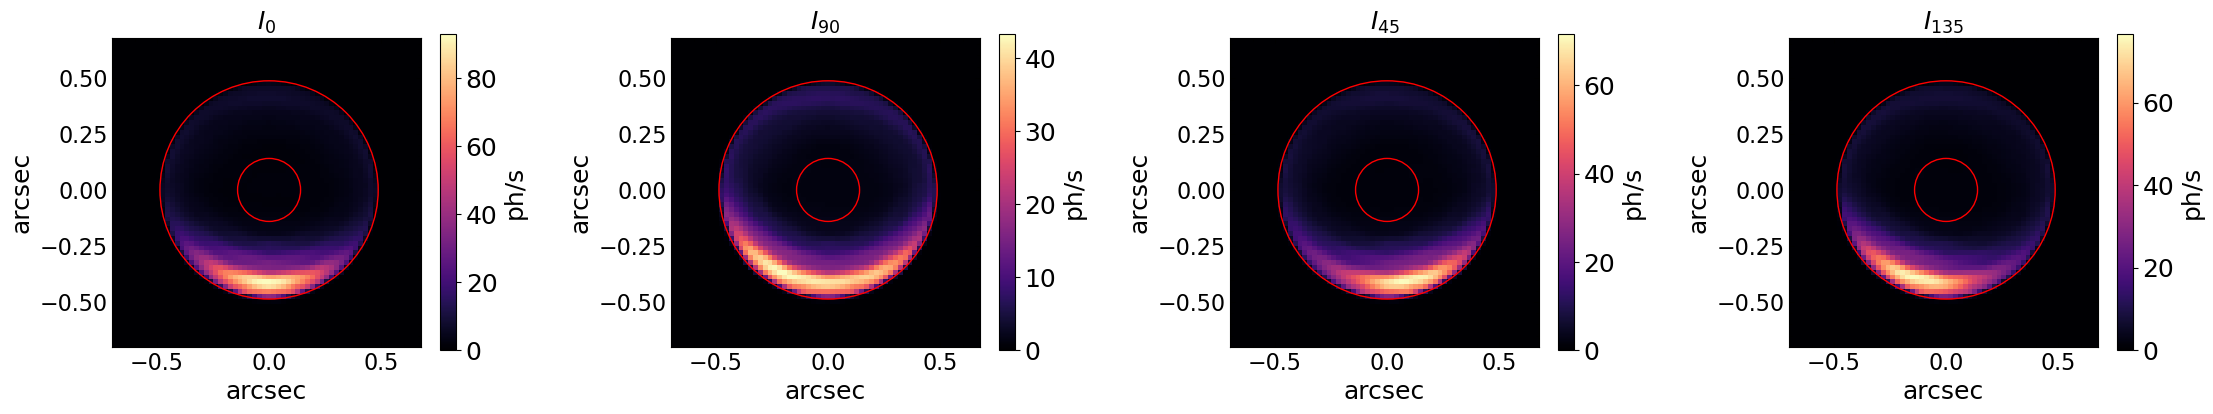

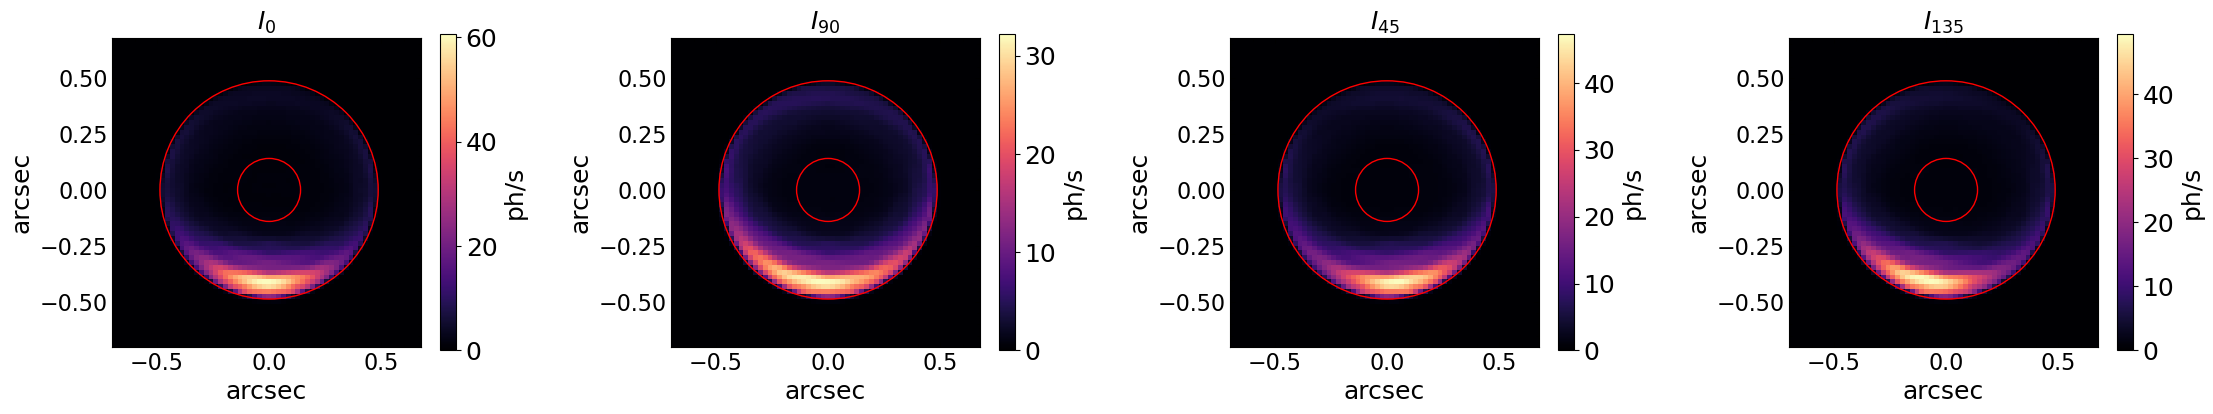

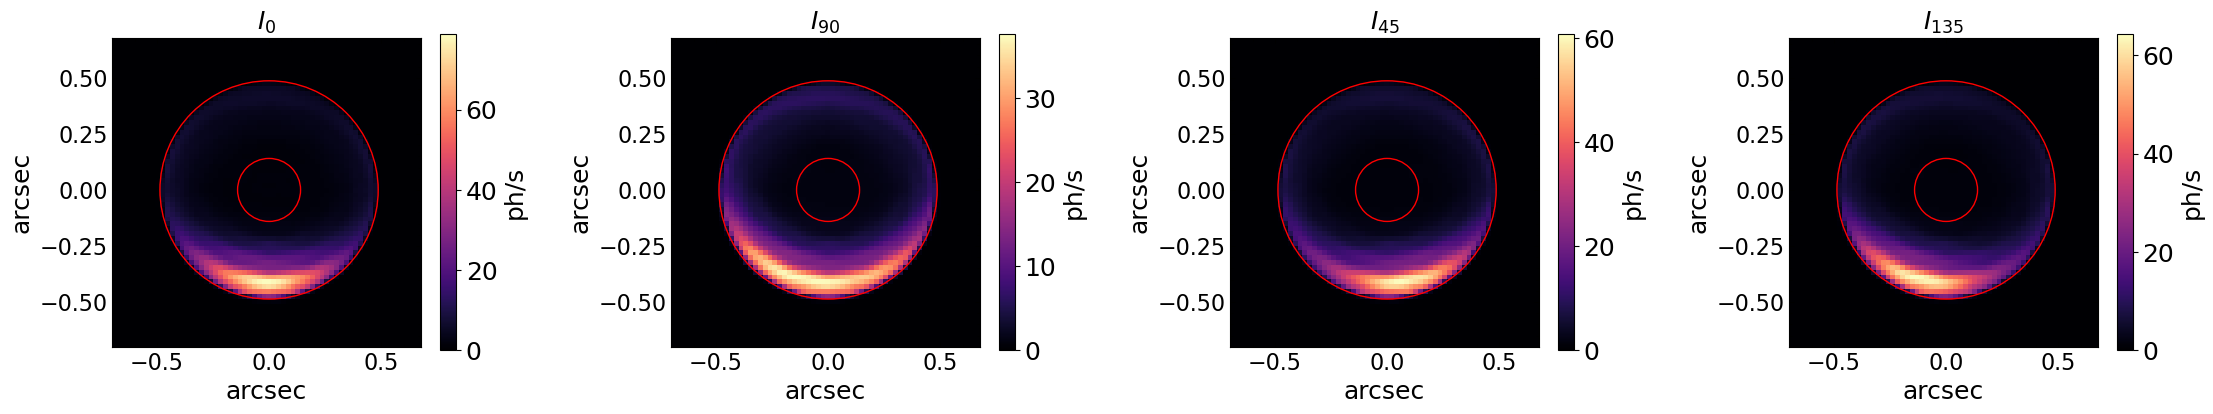

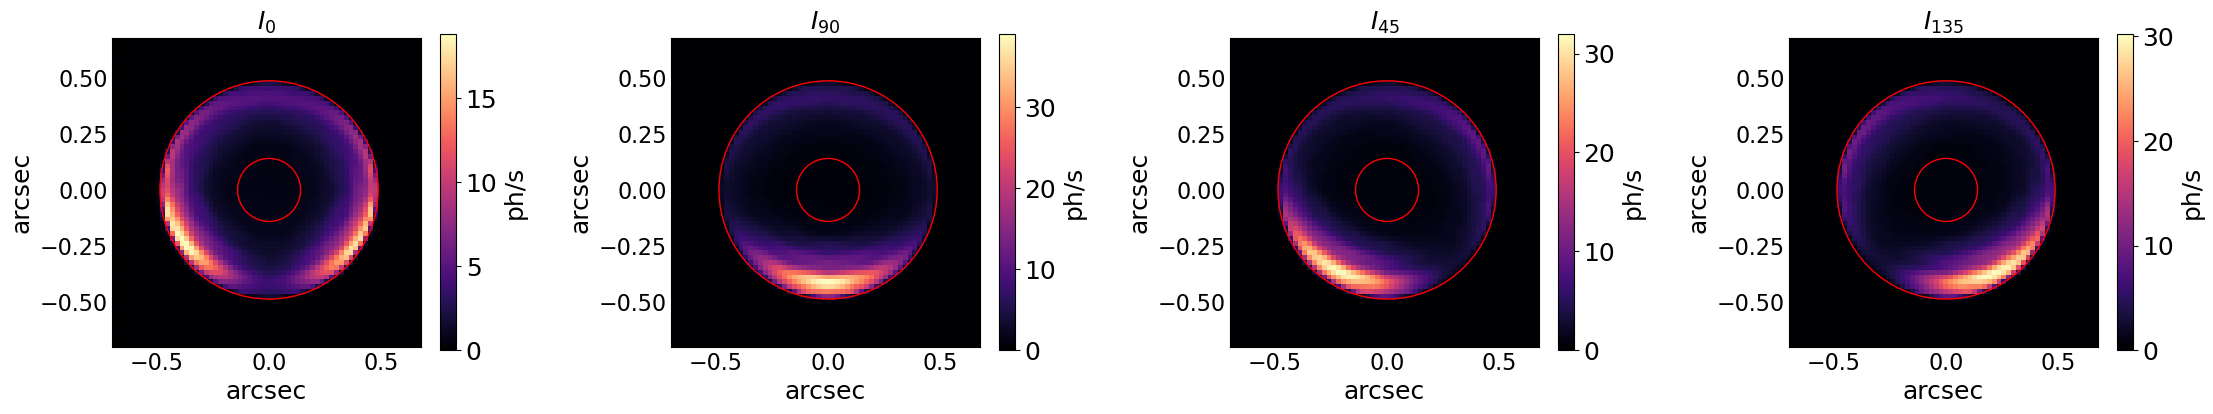

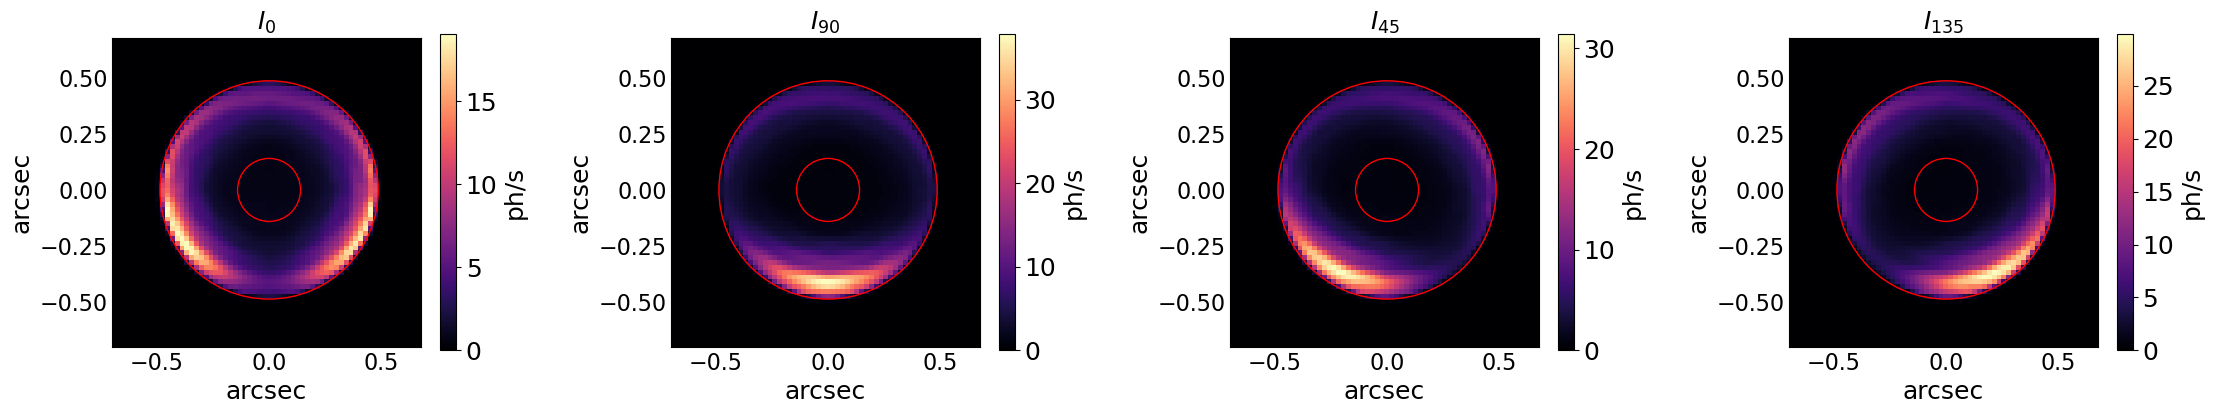

In [21]:
disksimimages(Inc_dir)

In [40]:
def disksimagespol(File_array):
    files=File_array
    l=len(files)
    ipsf_fpath = Path('/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Roman_psf/Hpc_run/final_psfs/hlc_band1_ipsfs_20230221.hdf5')
    f = h5py.File(ipsf_fpath, 'r')
    ipsf_matrix = np.array(f['ipsf_matrix'])
    f.close()
    figr=[]
    xpix=(np.arange (-32, 32, 1))*psf_pixelscale_mas.value/1000
    ypix=(np.arange (-32, 32, 1))*psf_pixelscale_mas.value/1000
    for i in range(0,l):
        
        I0=fits.getdata(files[i]+'I_0_hlc.fits')
        I90=fits.getdata(files[i]+'I_90_hlc.fits')
        I45=fits.getdata(files[i]+'I_45_hlc.fits')
        I135=fits.getdata(files[i]+'I_135_hlc.fits')
        
        px=128-32
        py=128+32
        
        disk0=I0[px:py,px:py]
        disk90=I90[px:py,px:py]
        disk45=I45[px:py,px:py]
        disk135=I135[px:py,px:py]
        
        disk0_sim=np.reshape(ipsf_matrix.dot(disk0.flatten()), (npsf,npsf))
        disk90_sim=np.reshape(ipsf_matrix.dot(disk90.flatten()), (npsf,npsf))
        disk45_sim=np.reshape(ipsf_matrix.dot(disk45.flatten()), (npsf,npsf))
        disk135_sim=np.reshape(ipsf_matrix.dot(disk135.flatten()), (npsf,npsf))
        
        
        Q=disk0_sim-disk90_sim
        U=disk45_sim-disk135_sim
        I=disk0_sim+disk90_sim
        
        np.seterr(invalid='ignore')
        

        X, Y = np.mgrid[(0):(64):64j, (0):(64):64j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        pos=np.transpose(positions)

        Phi=np.arctan((pos[:,0]-32)/(pos[:,1]-32))
        Phi_new=np.reshape(Phi,(64,64))

        
        
        Q_phi=-(Q*np.cos(2*Phi_new)+U*np.sin(2*Phi_new))
        U_phi=-Q*np.sin(2*Phi_new)+U*np.cos(2*Phi_new)
        p=Q_phi/I
        theta=0.5*np.arctan2(U,Q)
        Q_phi[np.isnan(Q_phi)]=0
        U_phi[np.isnan(U_phi)]=0
        p[np.isnan(p)]=0
        I[np.isnan(I)]=0
        theta[np.isnan(theta)]=0
        print(np.max(p))
        #p=np.sqrt(Q*Q+U*U)
           
        
        
        circ1=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ2=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ3=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ4=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ5=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ6=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        circ7=Circle((0, 0), iwa_mas.value/1000, color='r', fill=False)
        circ8=Circle((0, 0), owa_mas.value/1000, color='r', fill=False)
        
        path=files[i]
        fig_path=path+'polfrac_disk_sim_convolved'+'.pdf'
        
        fig = plt.figure(figsize=(25, 10))
        ax1=fig.add_subplot(141)
        ax1.yaxis.set_ticks_position('both')
        ax1.xaxis.set_ticks_position('both')
        ax1.minorticks_on()
        ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im1=ax1.imshow(Q,cmap='viridis',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax1.invert_yaxis()
        ax1.add_patch(circ1)
        ax1.add_patch(circ2)
        ax1.set_ylabel('arcsec',fontsize=18)
        ax1.set_xlabel('arcsec',fontsize=18)
        ax1.set_title('$q$',fontsize=18)
        cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)

        ax2=fig.add_subplot(142)
        ax2.yaxis.set_ticks_position('both')
        ax2.xaxis.set_ticks_position('both')
        ax2.minorticks_on()
        ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im2=ax2.imshow(U,cmap='viridis',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax2.invert_yaxis()
        ax2.add_patch(circ3)
        ax2.add_patch(circ4)
        ax2.set_ylabel('arcsec',fontsize=18)
        ax2.set_xlabel('arcsec',fontsize=18)
        ax2.set_title('$u$',fontsize=18)
        cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        
        ax3=fig.add_subplot(143)
        ax3.yaxis.set_ticks_position('both')
        ax3.xaxis.set_ticks_position('both')
        ax3.minorticks_on()
        ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im3=ax3.imshow(p,cmap='viridis',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax3.invert_yaxis()
        ax3.add_patch(circ5)
        ax3.add_patch(circ6)
        ax3.set_ylabel('arcsec',fontsize=18)
        ax3.set_xlabel('arcsec',fontsize=18)
        ax3.set_title('$p$',fontsize=18)
        cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)

        ax4=fig.add_subplot(144)
        ax4.yaxis.set_ticks_position('both')
        ax4.xaxis.set_ticks_position('both')
        ax4.minorticks_on()
        ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        im4=ax4.imshow(theta,cmap='viridis',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
        ax4.invert_yaxis()
        ax4.add_patch(circ7)
        ax4.add_patch(circ8)
        ax4.set_ylabel('arcsec',fontsize=18)
        ax4.set_xlabel('arcsec',fontsize=18)
        ax4.set_title('$theta$',fontsize=18)
        cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
        cb.ax.tick_params(labelsize=18)
        cb.set_label("radians",fontsize=18)
        
        fig.subplots_adjust(hspace=0.1, wspace=0.45, top=0.9, right=0.95)
        fig.savefig(fig_path, format='pdf', bbox_inches='tight')
        figr.append(fig)
    return(figr)

In [41]:
Main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/HLC_band_analog/'
Inc=['Astrosil/','Olivines/','Astrosil_Olivines/']
n=len(Inc)
Inc_dir=[]
for i in range(0,n):
    d_dir=Main_dir+Inc[i]
    Inc_dir.append(d_dir)

0.394691443497993
0.314045315701384
0.3652399331262318


[<Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>,
 <Figure size 2500x1000 with 8 Axes>]

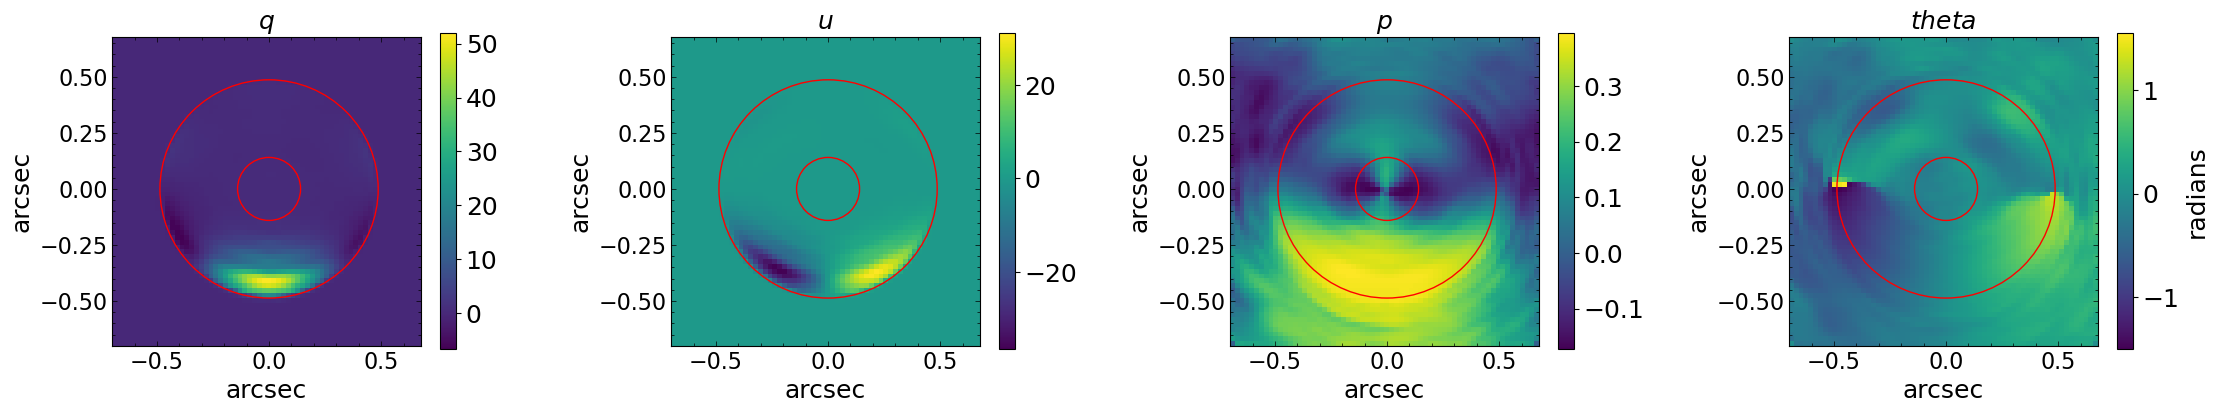

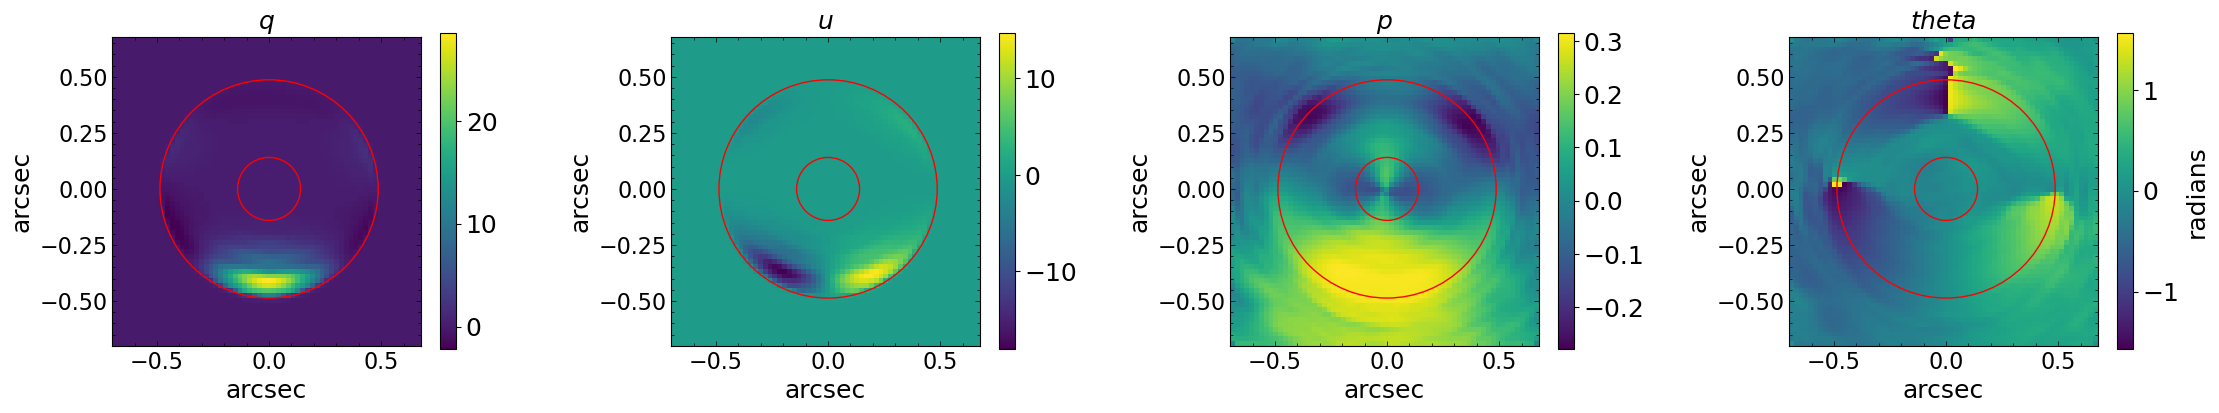

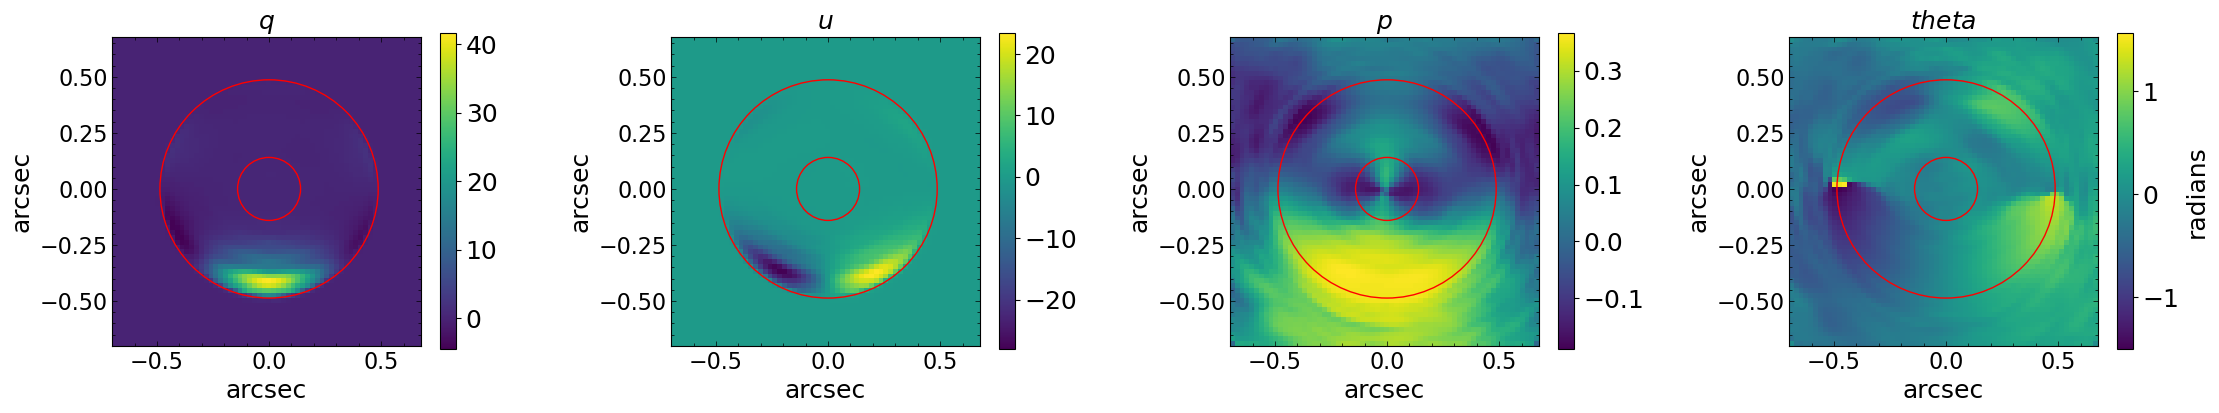

In [42]:
disksimagespol(Inc_dir)